# Analysis notebook for the compliance score results

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## General seaborn plot settings

In [2]:
palette = 'colorblind'
sns.set_palette(palette)

sns.set_style('darkgrid') # set to seaborn theme

matplotlib.rcParams.update({'font.size': 30, 'font.family': 'serif'})

## Create the dataframe from the csv file

In [3]:
# Load the data
df = pd.read_csv('datasets/Compliance_results.csv')
df

,Participant Nr,Condition_gender,Condition_speech,Condition,Step over,Unblocked door,Detour,Duck,Crawl,Get up,Aftershock
0,1,male,authoritative,0,0,1,1,1.0,1.0,1.0,0
1,2,female,authoritative,2,1,1,0,NaN,NaN,NaN,0
2,3,male,neutral,1,1,1,1,1.0,1.0,1.0,0
3,4,female,neutral,3,0,1,1,0.0,1.0,1.0,0
4,5,male,authoritative,0,1,1,1,1.0,1.0,NaN,0
5,6,female,authoritative,2,1,1,1,1.0,1.0,1.0,0
6,7,female,neutral,3,0,1,0,NaN,NaN,NaN,0
7,8,male,neutral,1,1,1,1,NaN,1.0,1.0,0


## Define the relevant columns with the instructions the participant was able to comply to

Here, the dataframe is restructured to access the compliance value to create the relevant plots for our paper.

In [4]:
all_instructions = ['Step over', 'Unblocked door', 'Detour', 'Duck', 'Crawl', 'Get up']
df[all_instructions].stack().mean()

0.85

In [5]:
# prepare dataframe for boxplot
df_melted = pd.melt(df,
                    id_vars=['Condition_gender', 'Condition_speech', 'Condition'],
                    value_vars=all_instructions,
                    var_name='Instruction',
                    value_name='Value').dropna()

df_melted.head()

,Condition_gender,Condition_speech,Condition,Instruction,Value
0,male,authoritative,0,Step over,0.0
1,female,authoritative,2,Step over,1.0
2,male,neutral,1,Step over,1.0
3,female,neutral,3,Step over,0.0
4,male,authoritative,0,Step over,1.0


After restructuring the dataframe, the plots with mean compliance scores (and standard deviation) depending on the conditions can be created:

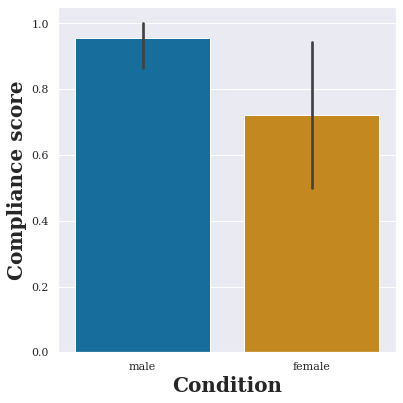

In [6]:
sns.set_theme()
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'serif'})

plt.figure(figsize=(6,6))
sns.barplot(data=df_melted,
            x='Condition_gender',
            y='Value',
            palette=palette)
plt.xticks([0, 1], ['male', 'female'])
plt.xlabel('Condition', font={'weight': 'bold'})
plt.ylabel('Compliance score', font={'weight': 'bold'})
plt.tight_layout()   
# plt.savefig('Plots/compliance_gender.pdf')
plt.show()

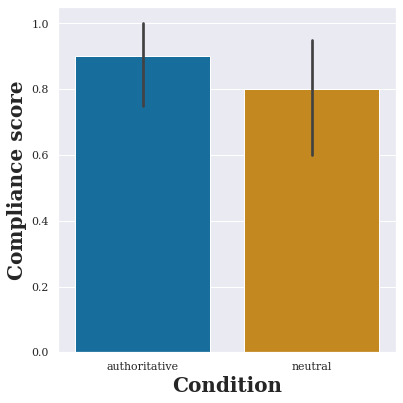

In [7]:
plt.figure(figsize=(6,6))
sns.barplot(data=df_melted,
            x='Condition_speech',
            y='Value',
            palette=palette)
plt.xticks([0, 1], ['authoritative', 'neutral'])
plt.xlabel('Condition', font={'weight': 'bold'})
plt.ylabel('Compliance score', font={'weight': 'bold'})
plt.tight_layout()
# plt.savefig('Plots/compliance_speech.pdf')
plt.show()

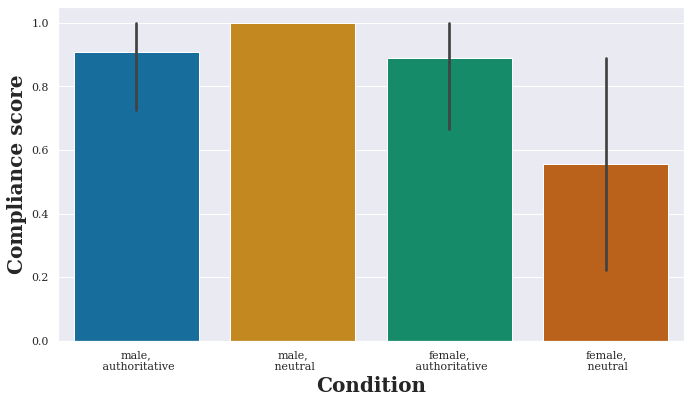

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted,
            x='Condition',
            y='Value',
            palette=palette)
plt.xticks([0, 1, 2, 3], ['male,\n authoritative', 'male,\n neutral', 'female,\n authoritative', 'female,\n neutral'])
plt.xlabel('Condition', font={'weight': 'bold'})
plt.ylabel('Compliance score', font={'weight': 'bold'})
plt.tight_layout()
# plt.savefig('Plots/compliance_combined.pdf')
plt.show()

## Some exploratory approach/ statistics to see if we find something interesting

In [9]:
# gender 
df_male = df_melted.loc[df_melted['Condition_gender'] == 'male']
df_female = df_melted.loc[df_melted['Condition_gender'] == 'female']

# speech
df_authoritative = df_melted.loc[df_melted['Condition_speech'] == 'authoritative']
df_neutral = df_melted.loc[df_melted['Condition_speech'] == 'neutral']

In [10]:
df_authoritative

,Condition_gender,Condition_speech,Condition,Instruction,Value
0,male,authoritative,0,Step over,0.0
1,female,authoritative,2,Step over,1.0
4,male,authoritative,0,Step over,1.0
5,female,authoritative,2,Step over,1.0
8,male,authoritative,0,Unblocked door,1.0
9,female,authoritative,2,Unblocked door,1.0
12,male,authoritative,0,Unblocked door,1.0
13,female,authoritative,2,Unblocked door,1.0
16,male,authoritative,0,Detour,1.0
17,female,authoritative,2,Detour,0.0


In [11]:
def print_mean_and_sd_from_dataframe(dataframe, condition_type):
    """
    """
    
    print('Results for condition ', condition_type)
    print('Mean: ', round(dataframe['Value'].mean(), 4))
    print('Standard deviation: ', round(dataframe['Value'].std(), 4))

In [12]:
print_mean_and_sd_from_dataframe(df_male, 'male')

Results for condition  male
Mean:  0.9545
Standard deviation:  0.2132


In [13]:
print_mean_and_sd_from_dataframe(df_female, 'female')

Results for condition  female
Mean:  0.7222
Standard deviation:  0.4609


In [14]:
print_mean_and_sd_from_dataframe(df_authoritative, 'authoritative')

Results for condition  authoritative
Mean:  0.9
Standard deviation:  0.3078


In [15]:
print_mean_and_sd_from_dataframe(df_authoritative, 'neutral')

Results for condition  neutral
Mean:  0.9
Standard deviation:  0.3078
